## Training

## Inference

In [1]:


import joblib
import numpy as np
import os

# ───────── 1. 路径 ─────────
model_path = '/data/hanzhe/20250424cs/umap_supervised/umap_model_supervised.joblib'
X_path    = '/data/hanzhe/20250424cs/ICE_data/ICE_GM/X_ICE_GM.npy'
save_path = '/data/hanzhe/20250424cs/ICE_GM/umap_super/ICE_GM_umap_super_inference.npy'

# ───────── 2. 载入模型和数据 ─────────
umap_model = joblib.load(model_path)     # 已训练好的 UMAP 对象
X_trimmed  = np.load(X_path)             # 原始高维特征

# ───────── 3. 降维 (transform) ─────────
#   transform() 会把新数据映射到模型学到的 2-D 空间
embedding = umap_model.transform(X_trimmed)   # shape: (n_samples, 2)

# ───────── 4. 保存并简单查看 ─────────
np.save(save_path, embedding)

print('降维完成！')



/home/user/anaconda3/envs/gpu/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-04-25 11:05:12.514625: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745579112.528183 2035680 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745579112.532320 2035680 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745579112.544388 2035680 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once

降维完成！


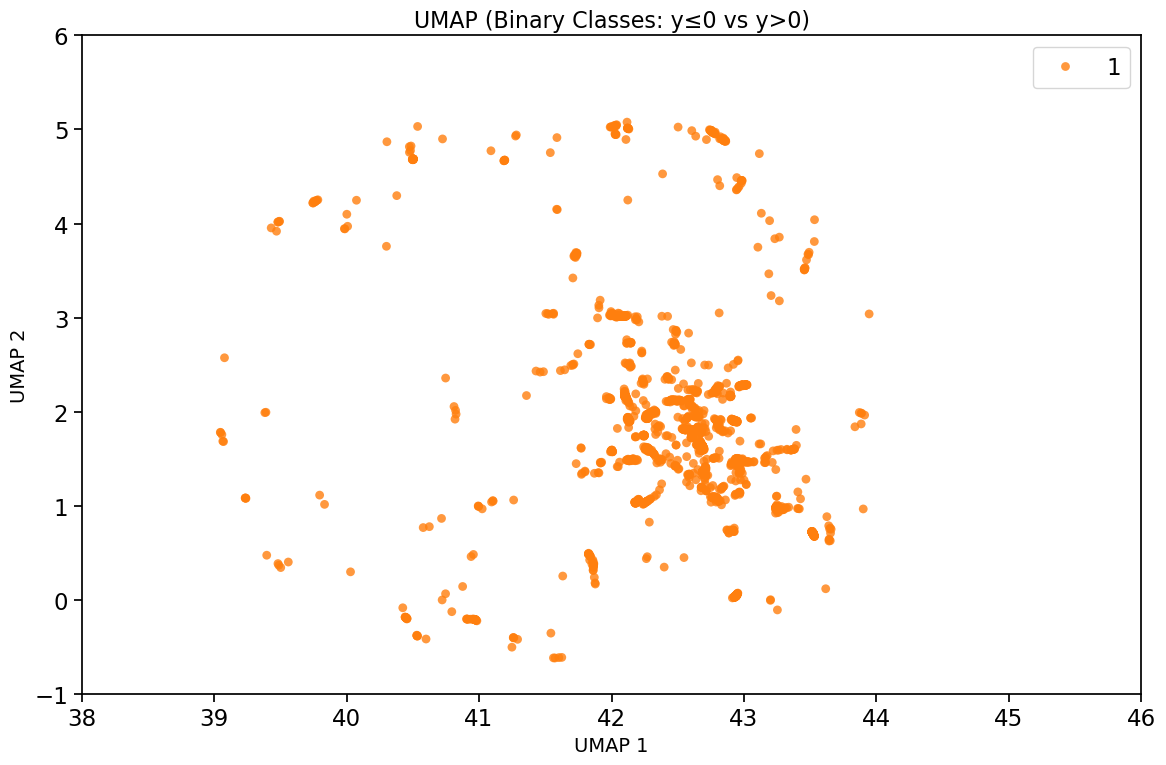

In [1]:
#!/usr/bin/env python
# coding: utf-8
"""
绘制二分类 UMAP 散点图
----------------------------------------
依赖:
  pip install numpy matplotlib seaborn
"""

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ───────── 1. 读取数据 ─────────
embed_path = '/data/hanzhe/20250424cs/ICE_GM/umap_super/ICE_GM_umap_super_inference.npy'
y_path     = '/data/hanzhe/20250424cs/ICE_data/ICE_GM/y_ICE_GM.npy'

embedding = np.load(embed_path)          # (n_samples, 2)
y         = np.load(y_path)              # (n_samples,)

# ───────── 2. 压缩为两类 ─────────
#   label_bin = 0  ⇨  y <= 0
#   label_bin = 1  ⇨  y > 0
label_bin = (y > 0).astype(int)

# ───────── 3. 绘图 ─────────
sns.set_context("notebook", font_scale=1.5)
plt.figure(figsize=(12, 8))

palette = {0: "#1f77b4", 1: "#ff7f0e"}    # 两种颜色，可自行调
sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=label_bin,
    palette=palette,
    alpha=0.8,
    s=40,
    edgecolor="none"
)

plt.title("UMAP (Binary Classes: y≤0 vs y>0)", fontsize=16)
plt.xlabel("UMAP 1", fontsize=14)
plt.ylabel("UMAP 2", fontsize=14)
x_min, x_max = 38, 46
y_min, y_max = -1, 6

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.tight_layout()


plt.show()

